# Midterm code starter
In this notebook, we will pull features out of the Kaggle version of the titanic data set.  We separate by sex and do a sample plot.

You can modify the plot as you see fit.

## Pull in the data
Read the train.csv data set into `df` and then display the first 10 instances

Later code is expecting to find the data frame in the variable df, so make sure that is what you use throughout.


### Get basic information on the features
Use hist() to look at the distribution of the features

In [4]:
# Question 1A code  [Answer]
import pandas as pd

train_data = pd.read_csv("train.csv", sep=",")
train_data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Fix missing values for age
Replace missing values for age with the average (mean).  Do the operation in place.

In [41]:
# remove rows that are missing values
train_data.dropna(axis='index', how="any", inplace=True)

age_average = train_data['Age'].mean()

# replace missing values by median or average (or any arbitrary value)
train_data['Age'].fillna(age_average, inplace=True)
train_data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


### Decision Tree classifier

I chose the features for you!

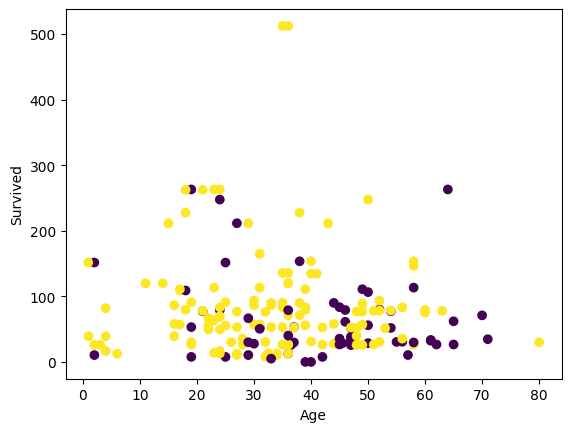

In [91]:
X = [['Age', 'Fare']]
y = ['Survived']

import matplotlib.pyplot as plt
Age = train_data ['Age']
Fare = train_data ['Fare']
Survived = train_data ['Survived']
plt.scatter(Age, Fare, c=Survived)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

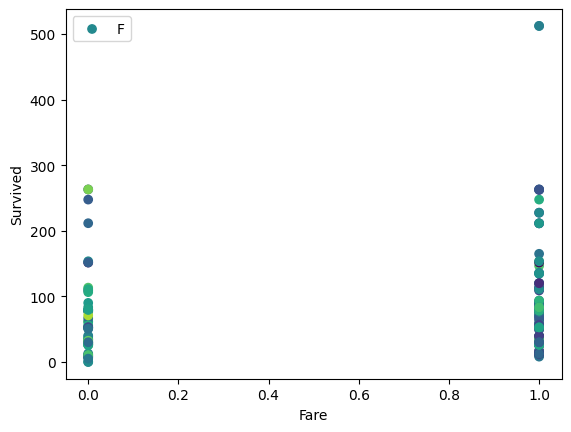

In [58]:
X = [['Age','Fare']]
y = ['Survived']
import matplotlib.pyplot as plt
Age = train_data ['Age']
Fare = train_data ['Fare']
Survived = train_data ['Survived']
plt.scatter(Survived, Fare, c=(Age))
plt.xlabel('Age')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.legend('Fare')
plt.show()

Build and train a decision tree classifier
Print the confusion matrix and scores for the trained model

Use the variable y_predicted to determine the performance of the model.  The graphing code below needs to have it defined in order to work correctly.

In [ ]:
# Question 3e, 3f, 3g code  [Answer]

In [35]:
import matplotlib.pyplot as plt

def plot2FeatureBinaryConfusion(data_set, feature1Label, feature2Label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)

   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')

    


    plt.xlabel(feature1Label)
    plt.ylabel(feature2Label)
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()

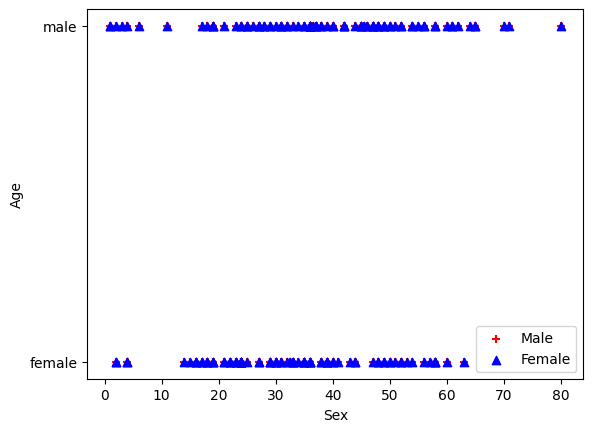

In [62]:
import numpy as np
import matplotlib.pyplot as plt
male_age = np.ma.masked_where(train_data['Sex']==0, 
 train_data['Age'])
female_age = np.ma.masked_where(train_data['Sex']==1, 
 train_data['Age'])
Age = train_data['Age']
plt.scatter(male_age, Sex, c='red', marker='+')
plt.scatter(female_age, Sex, c='blue', marker='^')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(['Male', 'Female'])
plt.show()

In [134]:
import matplotlib.pyplot as plt

def plot3FeatureBinaryConfusion(data_set, feature1Label, feature2Label, feature3label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)

   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')

    feature3 = data_set[feature3label]
    plt.scatter(true_positive, feature3, c='green', marker='o')
    plt.scatter(false_positive, feature3, c='red', marker='^')
    plt.scatter(true_negative, feature3, c='blue', marker='o')
    plt.scatter(false_negative, feature3, c='orange', marker='^')

    plt.xlabel(feature1Label)
    plt.xlabel(feature3label)
    plt.ylabel(feature2Label)
    
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['Age']]
X = train_set[['Fare']]
X = train_set[['Age', 'Fare']]
y = train_set['Survived']
X_test = test_set[['Age']]
X_test = test_set[['Fare']]
X_test = test_set[['Age', 'Fare']]
y_test = test_set['Survived']
tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)
y_predicted = tree_model.predict(X)
print('Results for decision tree on training data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_predicted))
print('Accuracy is ', accuracy_score(y, y_predicted))
print('Precision is ', precision_score(y, y_predicted))
print('Recall is ', recall_score(y,y_predicted))
print('F1 is ', f1_score(y, y_predicted))
y_test_predicted = tree_model.predict(X_test)
print('Results for decision tree on test data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_predicted))
print('Accuracy is ', accuracy_score(y_test, y_test_predicted))
print('Precision is ', precision_score(y_test, y_test_predicted))
print('Recall is ', recall_score(y_test,y_test_predicted))
print('F1 is ', f1_score(y_test, y_test_predicted))

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_data, 
 test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))
plot3FeatureBinaryConfusion(train_set, y_predicted, 'Age', 'Fare', 'Survived')

Results for decision tree on training data
 Default settings
Confusion Matrix
[[49  0]
 [ 0 97]]
Accuracy is  1.0
Precision is  1.0
Recall is  1.0
F1 is  1.0
Results for decision tree on test data
 Default settings
Confusion Matrix
[[ 5  6]
 [ 5 21]]
Accuracy is  0.7027027027027027
Precision is  0.7777777777777778
Recall is  0.8076923076923077
F1 is  0.7924528301886792
Train size:  146 Test size:  37


TypeError: plot3FeatureBinaryConfusion() missing 1 required positional argument: 'predicted'

### Graph for age vs survival, male/female splits

In [96]:
import matplotlib.pyplot as plt
import numpy as np
# Differentiate on sex
male = (["Sex"] == "male")
female = (["Sex"] == "female")
y_predicted = ('Survived')

# Get prediction status from the model
correct = (y - y_predicted) == 0   # true/false if a match
correctM = correct[male]
correctF = correct[female]

#Pull out the features for plotting

# Continuous features, so just use directly
ageM = [male]["Age"]
ageF = [female]["Age"]

fareM = [male]["Fare"]
fareF = [female]["Fare"]

numberMales = len(ageM)
numberFemales = len(ageF)

# Discrete categoies, so smear the values out by a random amount
smear = 0.45

pclassM = [male]["Pclass"]
pclassM += np.random.random(numberMales)*smear
pclassF = [female]["Pclass"]
pclassF += np.random.random(numberFemales)*smear

survivedM = [male]["Survived"]
survivedM += np.random.random(numberMales)*smear
survivedF = [female]["Survived"] 
survivedF += np.random.random(numberFemales)*smear

sibspM = [male]["SibSp"]
sibspM += np.random.random(numberMales)*smear
sibspF = [female]["SibSp"] 
sibspF += np.random.random(numberFemales)*smear

parchM = [male]["Parch"]
parchM += np.random.random(numberMales)*smear
parchF = [female]["Parch"] 
parchF += np.random.random(numberFemales)*smear

# Do the plot of age vs survival
plt.xlabel("Age")
plt.ylabel("Survived")

# Scatter plot Male then Female.  (Can reorder if wanted.)
plt.scatter(x=ageM, y=survivedM, marker="o", c="orange", s=30) 
plt.scatter(x=ageF, y=survivedF, marker="s", c="green", s=30) 

#Just mark the ones that are incorrect with X's
#Can comment these two lines out, not critical for the midterm 
#plt.scatter(x=ageM[~correctM], y=survivedM[~correctM], marker="x", c="black") 
#plt.scatter(x=ageF[~correctF], y=survivedF[~correctF], marker="x", c="black") 

plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 146 but corresponding boolean dimension is 183